In [ ]:
# Session 2

In [ ]:
#Exercise 6


 X1 = hours studied
 X2 = undergrad GPA
 Y = receive an A

 B0 = -6
 B1 = 0.05
 B2 = 1

 #a
 X2 = 3.5
 On solving we get p(X) = 0.378

 #b
 Here we have probablity equal to 0.5
 on sloving we get X1 = 50

In [ ]:
#Exercise 8

In [ ]:
#Exercise 9
#a
p(x)/ 1 - p(x) = 0.37
p(x) = 0.27

In [ ]:
#b
p(x) = 0.16/ 1-0.16
p(x) = 0.19

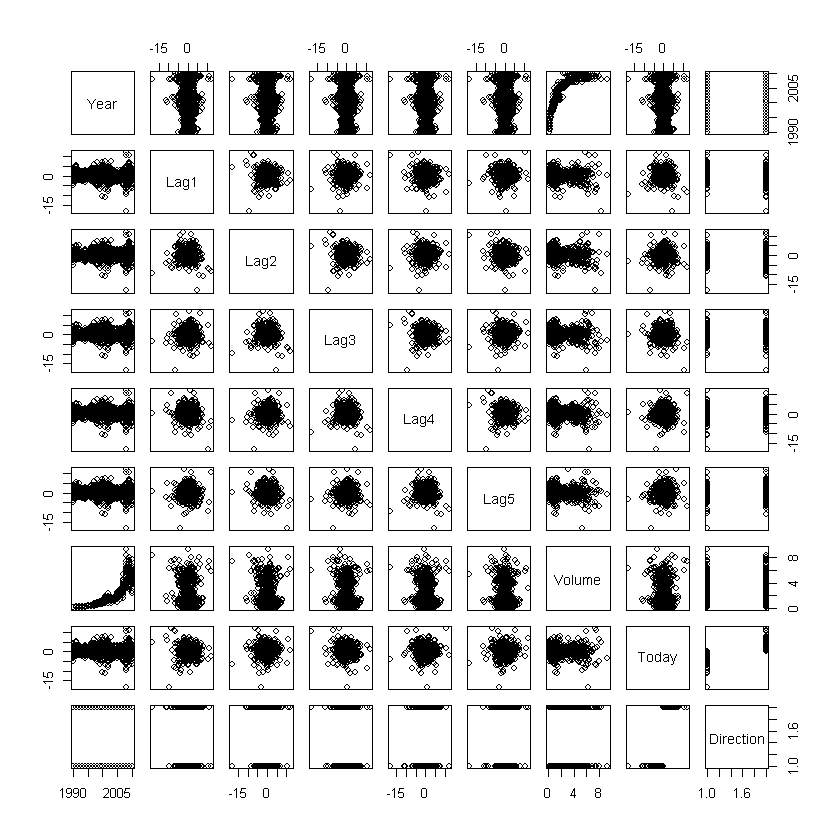

In [18]:
#Exercise 10

#a
library(ISLR)
pairs(Weekly)

In [22]:
cor(Weekly[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


In [23]:
#b
logistic <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, 
               data = Weekly, 
               family = "binomial")

summary(logistic)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [31]:
#C
predicted <- factor(ifelse(predict(logistic, type = "response")
                 < 0.5, "Down", "Up"))

confusionMatrix(predicted, Weekly$Direction, positive = "Up")


Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down   54  48
      Up    430 557
                                         
               Accuracy : 0.5611         
                 95% CI : (0.531, 0.5908)
    No Information Rate : 0.5556         
    P-Value [Acc > NIR] : 0.369          
                                         
                  Kappa : 0.035          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9207         
            Specificity : 0.1116         
         Pos Pred Value : 0.5643         
         Neg Pred Value : 0.5294         
             Prevalence : 0.5556         
         Detection Rate : 0.5115         
   Detection Prevalence : 0.9063         
      Balanced Accuracy : 0.5161         
                                         
       'Positive' Class : Up             
                                         

In [39]:
#D

train <- Weekly[Weekly$Year <= 2008, ]
test <- Weekly[Weekly$Year > 2008, ]

logistic <- glm(Direction ~ Lag2, 
               data = train, 
               family = "binomial")

logistic_prediction <- factor(ifelse(predict(logistic, newdata = test, 
                type = "response")  < 0.5, "Down", "Up"))

confusionMatrix(logistic_prediction, test$Direction, positive = "Up")

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.9180         
            Specificity : 0.2093         
         Pos Pred Value : 0.6222         
         Neg Pred Value : 0.6429         
             Prevalence : 0.5865         
         Detection Rate : 0.5385         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.5637         
                                         
       'Positive' Class : Up             
                                         

In [38]:
#E
model_lda <- lda(Direction ~ Lag2, data = train)


lda_prediction <- predict(model_lda, newdata = test)

confusionMatrix(data = lda_prediction$class,
                reference = test$Direction, 
                positive = "Up")

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.9180         
            Specificity : 0.2093         
         Pos Pred Value : 0.6222         
         Neg Pred Value : 0.6429         
             Prevalence : 0.5865         
         Detection Rate : 0.5385         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.5637         
                                         
       'Positive' Class : Up             
                                         

In [37]:
#F
model_qda <- qda(Direction ~ Lag2, data = train)


qda_prediction <- predict(model_qda, newdata = test)

confusionMatrix(data = qda_prediction$class,
                reference = test$Direction, 
                positive = "Up")

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    0  0
      Up     43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.5865          
         Neg Pred Value :    NaN          
             Prevalence : 0.5865          
         Detection Rate : 0.5865          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Up              
                              

In [ ]:
#G


In [40]:
#Exercise 11
#a
Auto$mpg01 <- factor(as.numeric(Auto$mpg > median(Auto$mpg)))

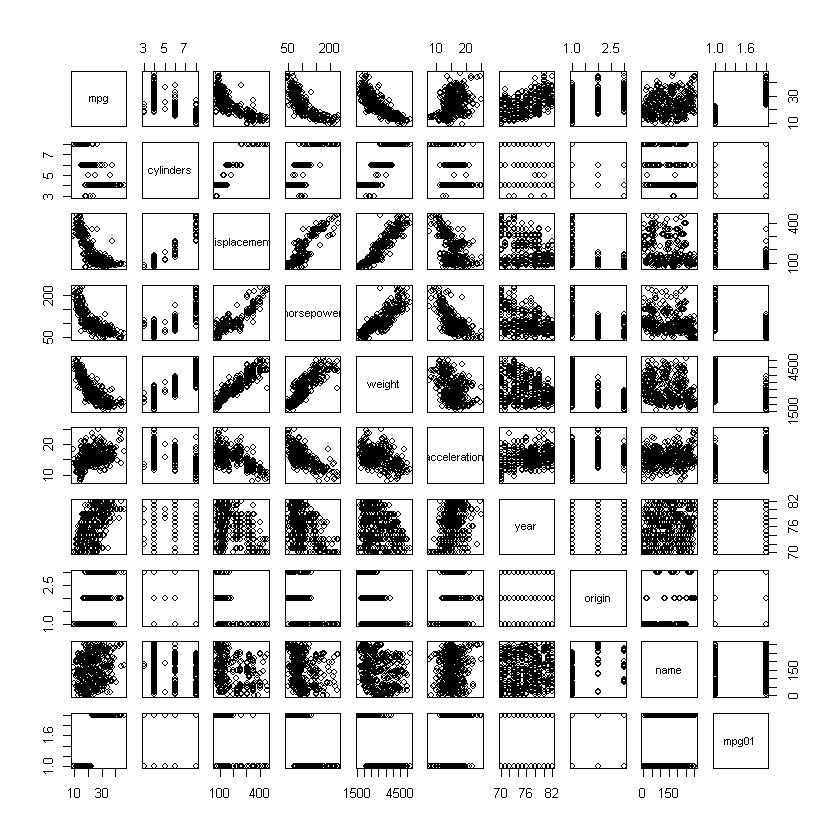

In [41]:
#b
pairs(Auto)

In [47]:
#c
set.seed(123)
train_idx <- createDataPartition(Auto$mpg01, p=.7, list=FALSE)
train <- Auto[train_idx, ]
test <- Auto[-train_idx, ]

In [51]:
#d
library(MASS)
md_lda <- lda(mpg01 ~ cylinders + horsepower +  weight , data=train)
md_lda

Call:
lda(mpg01 ~ cylinders + horsepower + weight, data = train)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  cylinders horsepower   weight
0  6.746377  128.83333 3572.681
1  4.202899   79.07246 2339.978

Coefficients of linear discriminants:
                     LD1
cylinders  -0.5454333983
horsepower  0.0035152492
weight     -0.0009732616

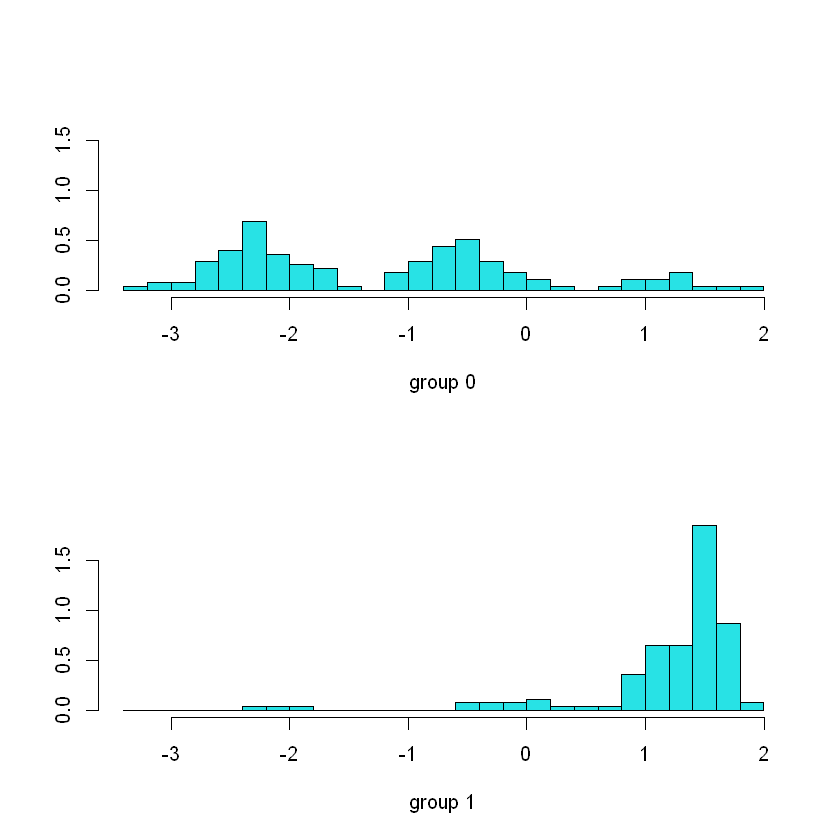

In [52]:
# options(repr.plot.width=4, repr.plot.height=8)
plot(md_lda)

In [54]:
# Predict and evaluate on test data
lda_pred <- predict(md_lda, newdata=test)
lda_pred

,0,1
2,0.98937944,0.0106205607
3,0.98301235,0.0169876489
10,0.99090490,0.0090950990
11,0.98503111,0.0149688894
15,0.03783399,0.9621660114
16,0.61717502,0.3828249753
25,0.52140207,0.4785979320
26,0.99812044,0.0018795642
27,0.99710231,0.0028976879
39,0.99681356,0.0031864407


In [58]:
#E
md_qda <- qda(mpg01 ~ cylinders + horsepower +  weight , data=train)
md_qda

Call:
qda(mpg01 ~ cylinders + horsepower + weight, data = train)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  cylinders horsepower   weight
0  6.746377  128.83333 3572.681
1  4.202899   79.07246 2339.978

In [59]:
# Predict and evaluate on test data
qda_pred <- predict(md_qda, newdata=test)
qda_pred

,0,1
2,1.00000000,2.523820e-09
3,0.99999993,7.259825e-08
10,1.00000000,5.026783e-13
11,1.00000000,2.765215e-10
15,0.03906396,9.609360e-01
16,0.69610806,3.038919e-01
25,0.64245074,3.575493e-01
26,1.00000000,1.873112e-16
27,1.00000000,7.140794e-14
39,0.99999999,8.828152e-09
